<a href="https://colab.research.google.com/github/Kunal-Aher/Kunal_Data_Study/blob/main/Covid_19_kunal_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,classification_report,confusion_matrix

In [ ]:
df=pd.read_csv(r"/content/WHOCOVID-19cases.csv",on_bad_lines='skip')

In [ ]:
print(df)

      Date_reported Country_code      Country Continent WHO_region  New_cases  \
0        05-01-2020           AF  Afghanistan      Asia       EMRO        NaN   
1        12-01-2020           AF  Afghanistan      Asia       EMRO        NaN   
2        19-01-2020           AF  Afghanistan      Asia       EMRO        NaN   
3        26-01-2020           AF  Afghanistan      Asia       EMRO        NaN   
4        02-02-2020           AF  Afghanistan      Asia       EMRO        NaN   
...             ...          ...          ...       ...        ...        ...   
58555    04-08-2024           ZW     Zimbabwe    Africa       AFRO        1.0   
58556    11-08-2024           ZW     Zimbabwe    Africa       AFRO        NaN   
58557    18-08-2024           ZW     Zimbabwe    Africa       AFRO        NaN   
58558    25-08-2024           ZW     Zimbabwe    Africa       AFRO        NaN   
58559    01-09-2024           ZW     Zimbabwe    Africa       AFRO        NaN   

       Cumulative_cases  Ne

In [ ]:
df.head()

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,05-01-2020,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
1,12-01-2020,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
2,19-01-2020,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
3,26-01-2020,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
4,02-02-2020,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0


In [ ]:
df.tail()

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
58555,04-08-2024,ZW,Zimbabwe,Africa,AFRO,1.0,266387,NaN,5740
58556,11-08-2024,ZW,Zimbabwe,Africa,AFRO,NaN,266387,NaN,5740
58557,18-08-2024,ZW,Zimbabwe,Africa,AFRO,NaN,266387,NaN,5740
58558,25-08-2024,ZW,Zimbabwe,Africa,AFRO,NaN,266387,NaN,5740
58559,01-09-2024,ZW,Zimbabwe,Africa,AFRO,NaN,266387,NaN,5740


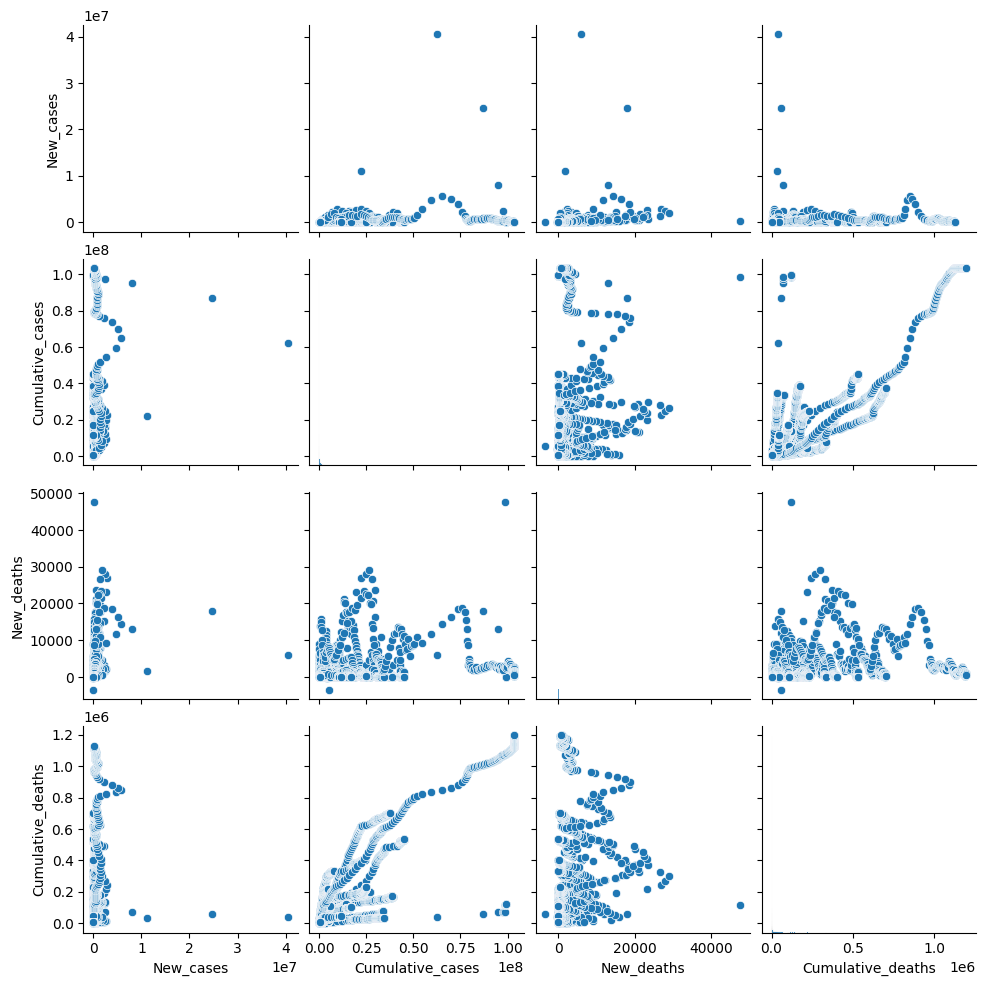

In [ ]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
df.columns


Index(['Date_reported', 'Country_code', 'Country', 'Continent', 'WHO_region',
       'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

<Axes: >

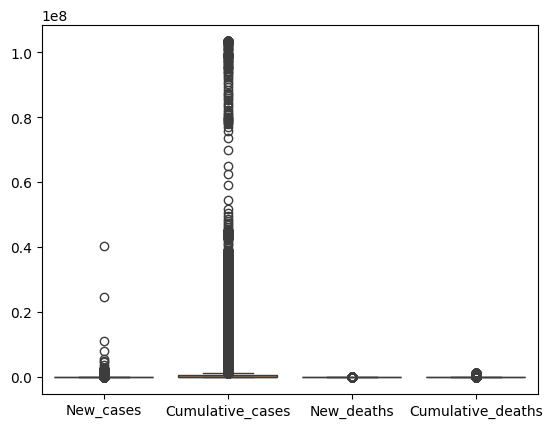

In [ ]:
sns.boxplot(data=df)

<Axes: >

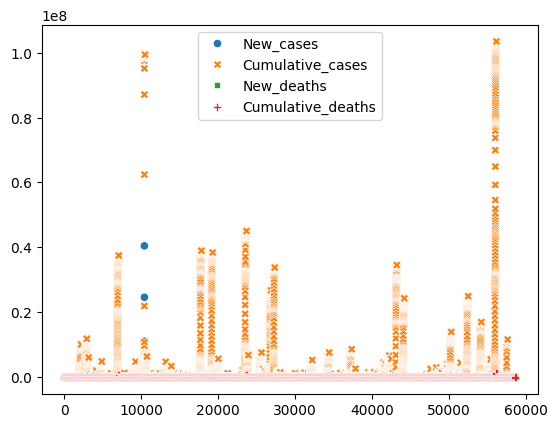

In [ ]:
sns.scatterplot(data=df)

In [ ]:
Q1 = df['Cumulative_cases'].quantile(0.25)
Q3 = df['Cumulative_cases'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = df[(df['Cumulative_cases'] < (Q1 - 1.5 * IQR)) | (df['Cumulative_cases'] > (Q3 + 1.5 * IQR))]
print("Outliers:\n", outliers)

# Remove outliers
dfs = df[(df['Cumulative_cases'] >= (Q1 - 1.5 * IQR)) & (df['Cumulative_cases'] <= (Q3 + 1.5 * IQR))]
print("Data without outliers:\n", df)

Outliers:
       Date_reported Country_code    Country      Continent WHO_region  \
1997     15-11-2020           AR  Argentina  South America       AMRO   
1998     22-11-2020           AR  Argentina  South America       AMRO   
1999     29-11-2020           AR  Argentina  South America       AMRO   
2000     06-12-2020           AR  Argentina  South America       AMRO   
2001     13-12-2020           AR  Argentina  South America       AMRO   
...             ...          ...        ...            ...        ...   
57579    04-08-2024           VN   Viet Nam           Asia       WPRO   
57580    11-08-2024           VN   Viet Nam           Asia       WPRO   
57581    18-08-2024           VN   Viet Nam           Asia       WPRO   
57582    25-08-2024           VN   Viet Nam           Asia       WPRO   
57583    01-09-2024           VN   Viet Nam           Asia       WPRO   

       New_cases  Cumulative_cases  New_deaths  Cumulative_deaths  
1997     67129.0           1355594      1452

<Axes: >

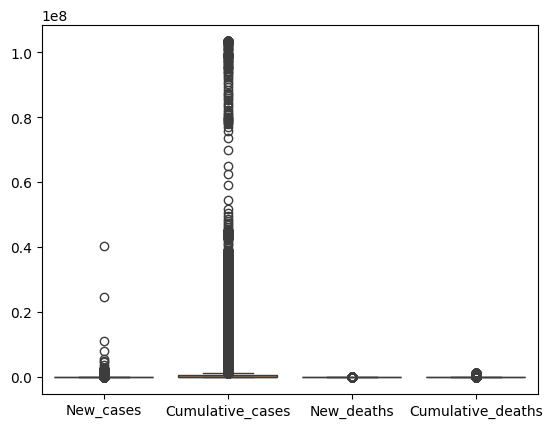

In [ ]:
sns.boxplot(data=df)

<Axes: >

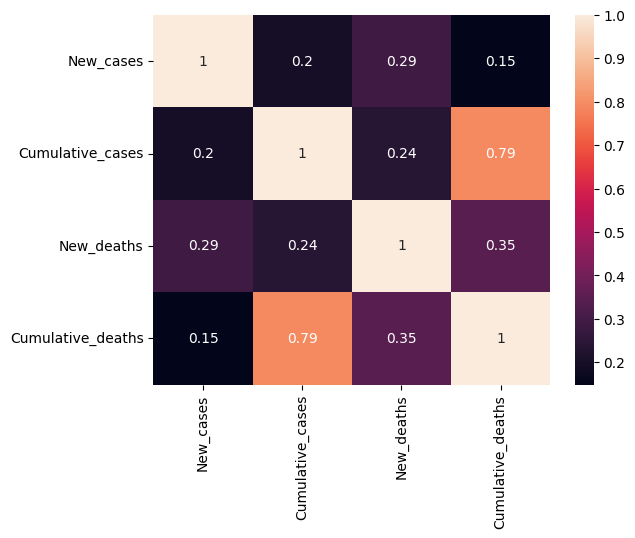

In [ ]:
sns.heatmap(df[['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']].corr(),annot=True)

In [ ]:
# calculateing the null values
Cal_null=df.isnull().sum()
print(Cal_null)

Date_reported            0
Country_code           244
Country                  0
Continent                0
WHO_region            4392
New_cases            19300
Cumulative_cases         0
New_deaths           33476
Cumulative_deaths        0
dtype: int64


In [ ]:
# calculateing the null values
Cal_null_percentage=df.isnull().sum() / len(df)*100
Cal_null_percentage

,0
Date_reported,0.000000
Country_code,0.416667
Country,0.000000
Continent,0.000000
WHO_region,7.500000
New_cases,32.957650
Cumulative_cases,0.000000
New_deaths,57.165301
Cumulative_deaths,0.000000


In [ ]:
df=df.replace(np.nan,0)
df

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,05-01-2020,AF,Afghanistan,Asia,EMRO,0.0,0,0.0,0
1,12-01-2020,AF,Afghanistan,Asia,EMRO,0.0,0,0.0,0
2,19-01-2020,AF,Afghanistan,Asia,EMRO,0.0,0,0.0,0
3,26-01-2020,AF,Afghanistan,Asia,EMRO,0.0,0,0.0,0
4,02-02-2020,AF,Afghanistan,Asia,EMRO,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...
58555,04-08-2024,ZW,Zimbabwe,Africa,AFRO,1.0,266387,0.0,5740
58556,11-08-2024,ZW,Zimbabwe,Africa,AFRO,0.0,266387,0.0,5740
58557,18-08-2024,ZW,Zimbabwe,Africa,AFRO,0.0,266387,0.0,5740
58558,25-08-2024,ZW,Zimbabwe,Africa,AFRO,0.0,266387,0.0,5740


In [ ]:
!pip install statsmodels

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'df' is your DataFrame and you want to analyze numerical features
# Select the numerical features for VIF calculation
numerical_features = df.select_dtypes(include=['number']).columns

# Create a new DataFrame with only numerical features
X = df[numerical_features]

# Add a constant column to the DataFrame for the intercept term
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

             feature       VIF
0              const  1.069021
1          New_cases  1.114665
2   Cumulative_cases  2.749848
3         New_deaths  1.234269
4  Cumulative_deaths  2.915456


In [ ]:
# Multilinear_regression
x=df[['Cumulative_cases','New_cases']]
y=df['Cumulative_deaths']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=35)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y=model.predict(x_test)

In [ ]:
coe=model.coef_
print(coe)

[ 0.00798155 -0.00569068]


In [ ]:
inter=model.intercept_
print(inter)

5520.039201476042


In [ ]:
y2=coe[0]*x_test['Cumulative_cases']+coe[1]*x_test['New_cases']+inter

In [ ]:
r_score=r2_score(y_test,y)
print(r_score)

0.6606855326982592


In [ ]:
# linear_regression
x=df[['Cumulative_cases']]
y=df['Cumulative_deaths']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y=model.predict(x_test)

In [ ]:
train_score=model.score(x_train,y_train)
print(train_score)

0.6229019396704709


In [ ]:
test_score=model.score(x_test,y_test)
print(test_score)

0.6408742696000331


In [ ]:
r_score=r2_score(y_test,y)
print(r_score)

0.6408742696000331


In [ ]:
x1=df[['Cumulative_cases','New_cases']]
y1=df['Cumulative_deaths']

In [ ]:
# x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=50)

In [ ]:
# from sklearn.svm import SVR
# model=SVR()
# model.fit(x1_train,y1_train)


SVR()